# Clustering

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import numpy.random as rng
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from time import time

n_col = 16
pic = 'https://www.dropbox.com/s/bmwwfct2qxjfje4/sutd.png?dl=1'
img = mpimg.imread(pic)
img = img[:,:,:3]

w,h,d = tuple(img.shape)
image_array = np.reshape(img, (w*h, d))
print(w,h,d)
print(image_array.shape)

def recreate_image(palette, labels, w, h):
    d = palette.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = palette[labels[label_idx]]
            label_idx += 1
    return image

686 1030 3
(706580, 3)


# (a) Color quantization with k-Means Clustering
First, sample 1000 pixels at random from the original image. Use `sklearn.cluster.KMeans` to partition the colors of these pixels into 32 clusters. Extract the cluster centers as kmeans_palette, and use the trained KMeans object to predict the pixel labels.

## Approach
First, we use `sklearn.utils.shuffle()` to shuffle `image_array`. Then, we take the first 1000 RGB pixels.

We create a `KMeans` object with `n_col=32` clusters, and call `fit()` on the 1000 RGB pixels. We extract the cluster centers/means by accessing the property `cluster_centers_`.

Finally, we predict the labels with `predict()` on the original flattened image array.

In [36]:
sample = shuffle(image_array)[:1000]
kmeans = KMeans(n_clusters=n_col).fit(sample)
kmeans_palette = kmeans.cluster_centers_
kmeans_labels = kmeans.predict(image_array)

# (b) Color quantization using a color palette from 32 randomly sampled colors

Now, sample 32 pixels at random from the original image. Use their colors to form a random palette. Compute the label for each pixel of the original image by finding the color in the palette that is closest to the color of the pixel. You may apply `sklearn.metrics.pairwise_distances_argmin` directly to find the closest representative.

## Approach
Similar to (a), but we try using both `KMeans` as well as `pairwise_distances_argmin` to compare the two.

In [42]:
sample_random = shuffle(image_array)[:32]

# Method 1 - KMeans
t = time()
kmeans_random = KMeans(n_clusters=n_col).fit(sample_random)
random_palette = kmeans_random.cluster_centers_
random_labels = kmeans_random.predict(image_array)
print("Time taken for KMeans: %0.3fs"%(time()-t))

# Method 2 - Pairwise distances
t = time()
random_labels_pairwise = pairwise_distances_argmin(sample_random, image_array, axis=0)
print("Time taken for pairwise: %0.3fs"%(time()-t))

print(random_labels)
print(random_labels_pairwise)
print(np.array_equal(random_labels, random_labels_pairwise))

Time taken for KMeans: 0.191s
Time taken for pairwise: 0.192s
[ 2 12 12 ... 15 15 15]
[23  0  0 ... 23 23  2]
False


## Visualization

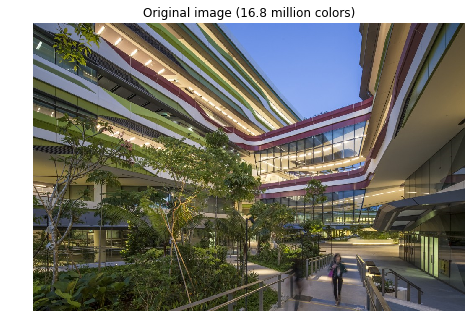

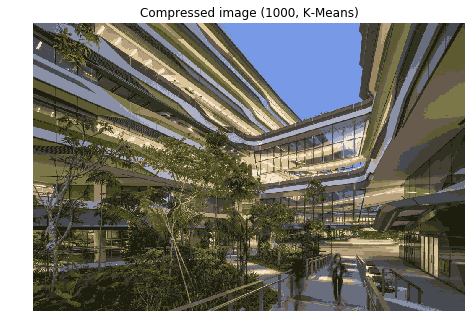

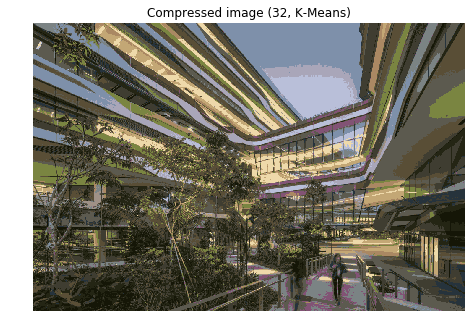

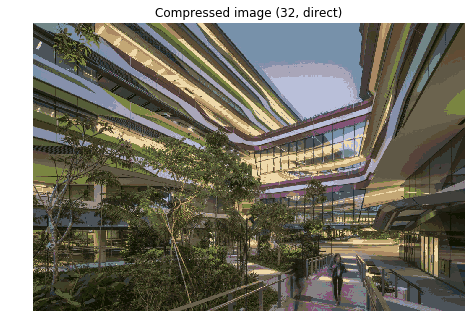

In [43]:
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (16.8 million colors)')
plt.imshow(img)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Compressed image (1000, K-Means)')
plt.imshow(recreate_image(kmeans_palette, kmeans_labels, w, h))

plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Compressed image (32, K-Means)')
plt.imshow(recreate_image(random_palette, random_labels, w, h))

plt.figure(4)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Compressed image (32, direct)')
plt.imshow(recreate_image(sample_random, random_labels_pairwise, w, h))
plt.show()

# (c) Proof of centroid minimizing distance between points in the cluster

Given a cluster $\{x^{(1)},x^{(2)},\ldots,x^{(m)}\}$ of points, prove that the point $z$ minimizing $\sum^{m}_{i=1}\lVert \, x^{(i)}-z \, \rVert^2$ is the centroid $z = \frac{1}{m}\sum^{m}_{i=1}x^{(i)}$

## Approach

We want to minimize $f(z) = \sum^m_{i=1}\lVert \, x^{(i)}-z \, \rVert^2$, which occurs when $\frac{\partial f}{\partial z} = 0$.

$\frac{\partial}{\partial z} \sum^m_{i=1}\lVert \, x^{(i)}-z \, \rVert^2 = 0$

Differentiating with respect to $z$,

$2\,(-1)\cdot\sum^m_{i=1}\lVert \, x^{(i)}-z \, \rVert = 0$

$\sum^m_{i=1}\lVert \, x^{(i)}-z \, \rVert = 0$

Since $z$ is independent of $i$,

$\sum^m_{i=1}x^{(i)}-m\cdot z = 0$

Finally,

$z = \frac{1}{m} \sum^m_{i=1}x^{(i)}$


